In [1]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
#bring in CSV 
census_df = pd.read_csv("census_df_isoto-Copy1.csv")
census_df.head()

,Unnamed: 0,Name,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Count Hisp/Latino,Counb Black/AfAm,Count AmIndian,Count Asian,Count White,Count Other Race,Zipcode
0,0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,3175.0,4002.0,6.0,232.0,4018.0,0.0,77002
1,1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,5351.0,2063.0,0.0,443.0,2318.0,26.0,77003
2,2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,3358.0,16520.0,10.0,2149.0,7198.0,120.0,77004
3,3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,2076.0,746.0,25.0,2484.0,19856.0,60.0,77005
4,4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,3816.0,695.0,38.0,1127.0,13874.0,66.0,77006


In [4]:
#see if there are null values in data
census_df.isnull().values.any()

False

In [5]:
#do an ANOVA test! look at zip codes, and the household income changes per race

#want to look at differences etween group means, the groups being years and changes of race and income in those zips
#split up data into years
yr2012 = census_df[census_df["Year"] ==2012]
# yr2013 = census_df[census_df["Year"]==2013]
# yr2014 = census_df[census_df["Year"] ==2014]
# yr2015 = census_df[census_df["Year"]==2015]
# yr2016 = census_df[census_df["Year"]==2016]
# yr2017 = census_df[census_df["Year"]==2017]

df_test = yr2012.groupby(["Zipcode"])
hisp_lat_count = df_test["Count Hisp/Latino"].sum()
af_am_count = df_test["Counb Black/AfAm"].sum()


# group2 = census_pd[census_pd["Zipcode"]== "77003"]["Counb Black/AfAm"]
# group3 = census_pd[census_pd["Zipcode"]== "77030"]["Counb Black/AfAm"]

#df=yr2012.pivot_table(df,index='Count Hisp/Latino',columns='platform',values='count')

yr2012.head()

,Unnamed: 0,Name,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Count Hisp/Latino,Counb Black/AfAm,Count AmIndian,Count Asian,Count White,Count Other Race,Zipcode
0,0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,3175.0,4002.0,6.0,232.0,4018.0,0.0,77002
1,1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,5351.0,2063.0,0.0,443.0,2318.0,26.0,77003
2,2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,3358.0,16520.0,10.0,2149.0,7198.0,120.0,77004
3,3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,2076.0,746.0,25.0,2484.0,19856.0,60.0,77005
4,4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,3816.0,695.0,38.0,1127.0,13874.0,66.0,77006


In [6]:
# drop unnamed and name columns 
data = census_df[['Zipcode', 'Year',
            'Count Hisp/Latino',
            'Counb Black/AfAm', 
             'Count AmIndian', 
             'Count Asian', 
             'Count White',
            'Count Other Race','Household Income', 'Population', 'Median Age',
            'Per Capita Income', 'Poverty Count', ]]

# MELT the data
melted_df = data.melt(id_vars=['Zipcode','Year', 'Household Income', 
                               'Population','Median Age',
                               'Per Capita Income', 'Poverty Count'], var_name='Race', value_name='Race Count')

# sort it back by zipcode and Year 
final_df = melted_df.sort_values(['Zipcode', 'Year'], ascending=[True, True])
# reset index
final_df = final_df.reset_index(drop=True)

# print first five rows
final_df.head()


,Zipcode,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Race,Race Count
0,77002,2012,57165.0,11473.0,31.8,32514.0,813.0,Count Hisp/Latino,3175.0
1,77002,2012,57165.0,11473.0,31.8,32514.0,813.0,Counb Black/AfAm,4002.0
2,77002,2012,57165.0,11473.0,31.8,32514.0,813.0,Count AmIndian,6.0
3,77002,2012,57165.0,11473.0,31.8,32514.0,813.0,Count Asian,232.0
4,77002,2012,57165.0,11473.0,31.8,32514.0,813.0,Count White,4018.0


In [7]:
#the three zip codes we want to look at
zip_003 = final_df[final_df["Zipcode"] ==77003]
zip_007 = final_df[final_df["Zipcode"]==77007]
zip_007

,Zipcode,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Race,Race Count
180,77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,Count Hisp/Latino,8334.0
181,77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,Counb Black/AfAm,1280.0
182,77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,Count AmIndian,19.0
183,77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,Count Asian,1958.0
184,77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,Count White,17260.0
185,77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,Count Other Race,149.0
186,77007,2013,98725.0,30868.0,34.6,70544.0,2936.0,Count Hisp/Latino,7927.0
187,77007,2013,98725.0,30868.0,34.6,70544.0,2936.0,Counb Black/AfAm,1177.0
188,77007,2013,98725.0,30868.0,34.6,70544.0,2936.0,Count AmIndian,90.0
189,77007,2013,98725.0,30868.0,34.6,70544.0,2936.0,Count Asian,1950.0


In [35]:
#zip per year
zip003_yr2012 = zip_003[zip_003["Year"]== 2012]
zip003_yr2013 = zip_003[zip_003["Year"]== 2013]
zip003_yr2014 = zip_003[zip_003["Year"]== 2014]
zip003_yr2015 = zip_003[zip_003["Year"]== 2015]
zip003_yr2016 = zip_003[zip_003["Year"]== 2016]
zip003_yr2017 = zip_003[zip_003["Year"]== 2017]
# yr2013 = census_df[census_df["Year"]==2013]
# yr2014 = census_df[census_df["Year"] ==2014]
# yr2015 = census_df[census_df["Year"]==2015]
# yr2016 = census_df[census_df["Year"]==2016]
# yr2017 = census_df[census_df["Year"]==2017]
zip_003


,Zipcode,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Race,Race Count
36,77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,Count Hisp/Latino,5351.0
37,77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,Counb Black/AfAm,2063.0
38,77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,Count AmIndian,0.0
39,77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,Count Asian,443.0
40,77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,Count White,2318.0
41,77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,Count Other Race,26.0
42,77003,2013,36412.0,10617.0,30.8,27263.0,4130.0,Count Hisp/Latino,5615.0
43,77003,2013,36412.0,10617.0,30.8,27263.0,4130.0,Counb Black/AfAm,1885.0
44,77003,2013,36412.0,10617.0,30.8,27263.0,4130.0,Count AmIndian,0.0
45,77003,2013,36412.0,10617.0,30.8,27263.0,4130.0,Count Asian,587.0


In [9]:
#analysis of group differences of a race within zip codes per year
#EDO HISP LATINO PER YEAR DOESN'T WORK, ASK SATURDAY
# test_group1 = zip003_yr2012[zip003_yr2012["Race"] == "Count Hisp/Latino"]["Household Income"]
# test_group2 = zip003_yr2013[zip003_yr2013["Race"] == "Count Hisp/Latino"]["Household Income"]
# test_group3 = zip003_yr2014[zip003_yr2014["Race"] == "Count Hisp/Latino"]["Household Income"]
# test_group4 = zip003_yr2015[zip003_yr2015["Race"] == "Count Hisp/Latino"]["Household Income"]
# test_group5 = zip003_yr2016[zip003_yr2016["Race"] == "Count Hisp/Latino"]["Household Income"]
# test_group6 = zip003_yr2017[zip003_yr2017["Race"] == "Count Hisp/Latino"]["Household Income"]


In [10]:
# stats.f_oneway(test_group1, test_group2, test_group3, test_group4, test_group5, test_group6)

In [11]:
#Analysis of household income for race per zip 77003
## won't work, because we don't have income for each race per zip

# group1 = zip_003[zip_003["Race"] == "Count Hisp/Latino"]["Household Income"]
# group2 = zip_003[zip_003["Race"] == "Counb Black/AfAm"]["Household Income"]
# group3 = zip_003[zip_003["Race"] == "Count White"]["Household Income"]
# group4 = zip_003[zip_003["Race"] == "Count Asian"]["Household Income"]
# group5 = zip_003[zip_003["Race"] == "Count AmIndian"]["Household Income"]
# group6 = zip_003[zip_003["Race"] == "Count Other Race"]["Household Income"]

# #analysis of race per zip 77007
# group1_007 = zip_007[zip_007["Race"] == "Count Hisp/Latino"]["Household Income"]
# group2_007 = zip_007[zip_007["Race"] == "Counb Black/AfAm"]["Household Income"]
# group3_007 = zip_007[zip_007["Race"] == "Count White"]["Household Income"]
# group4_007 = zip_007[zip_007["Race"] == "Count Asian"]["Household Income"]
# group5_007 = zip_007[zip_007["Race"] == "Count AmIndian"]["Household Income"]
# group6_007 = zip_007[zip_007["Race"] == "Count Other Race"]["Household Income"]

In [12]:
#analysis of group differences of a race within a zip 77003
#why does p value equal nan?
# ANOVA_003 = stats.f_oneway(group1, group2, group3, group4, group5, group6)
# ANOVA_003

In [13]:
# ANOVA_007 = stats.f_oneway(group1_007, group2_007, group3_007, group4_007, group5_007, group6_007)
# ANOVA_007

In [21]:
#analysis of vairance zip and population

pop_003 = census_df[census_df["Zipcode"]==77003]["Population"]
pop_008 = census_df[census_df["Zipcode"]==77008]["Population"]
pop_007 = census_df[census_df["Zipcode"]==77007]["Population"]
pop_026 = census_df[census_df["Zipcode"]==77026]["Population"]


In [24]:
ANOVA_pop = stats.f_oneway(pop_003, pop_008, pop_007, pop_026)
ANOVA_pop

F_onewayResult(statistic=278.56408336054585, pvalue=1.7810577568661499e-16)

In [16]:
#analysis of variance zip and age
age_003 = census_df[census_df["Zipcode"]==77003]["Median Age"]
age_008 = census_df[census_df["Zipcode"]==77008]["Median Age"]
age_007 = census_df[census_df["Zipcode"]==77007]["Median Age"]
age_026 = census_df[census_df["Zipcode"]==77026]["Median Age"]


In [25]:
ANOVA_age = stats.f_oneway(age_003, age_008, age_007, age_026)
ANOVA_age

F_onewayResult(statistic=10.711387129500133, pvalue=0.0002060830183355059)

In [31]:
#analysis of variance zip and household income
income_003 = census_df[census_df["Zipcode"]==77003]["Household Income"]
inocme_008 = census_df[census_df["Zipcode"]==77008]["Household Income"]
income_007 = census_df[census_df["Zipcode"]==77007]["Household Income"]
income_026 = census_df[census_df["Zipcode"]==77026]["Household Income"]

income_026

16     20200.0
35     20024.0
54     21335.0
73     22242.0
92     25354.0
111    26644.0
Name: Household Income, dtype: float64

In [26]:
ANOVA_income = stats.f_oneway(income_003, inocme_008, income_007, income_026)
ANOVA_income

F_onewayResult(statistic=99.24201522961962, pvalue=3.5090707198851038e-12)

In [33]:
race_count_hisp = zip_003 [zip_003 ["Race"]== "Count Hisp/Latino"]["Race Count"]
race_count_black = zip_003[zip_003["Race"]== "Counb Black/AfAm"]["Race Count"]
race_count_white = zip_003[zip_003["Race"]== "Count White"]["Race Count"]
race_count_asian = zip_003[zip_003["Race"]== "Count Asian"]["Race Count"]
race_count_AmInd = zip_003[zip_003["Race"]== "Count AmIndian"]["Race Count"]
race_count_other = zip_003[zip_003["Race"]== "Count Other Race"]["Race Count"]


36    5351.0
42    5615.0
48    5577.0
54    5320.0
60    5441.0
66    4834.0
Name: Race Count, dtype: float64

In [34]:
ANOVA_race_count = stats.f_oneway(race_count_hisp, race_count_black, race_count_white, race_count_asian, race_count_AmInd, race_count_other)
ANOVA_race_count

F_onewayResult(statistic=847.5576251174277, pvalue=2.4659496131557764e-31)

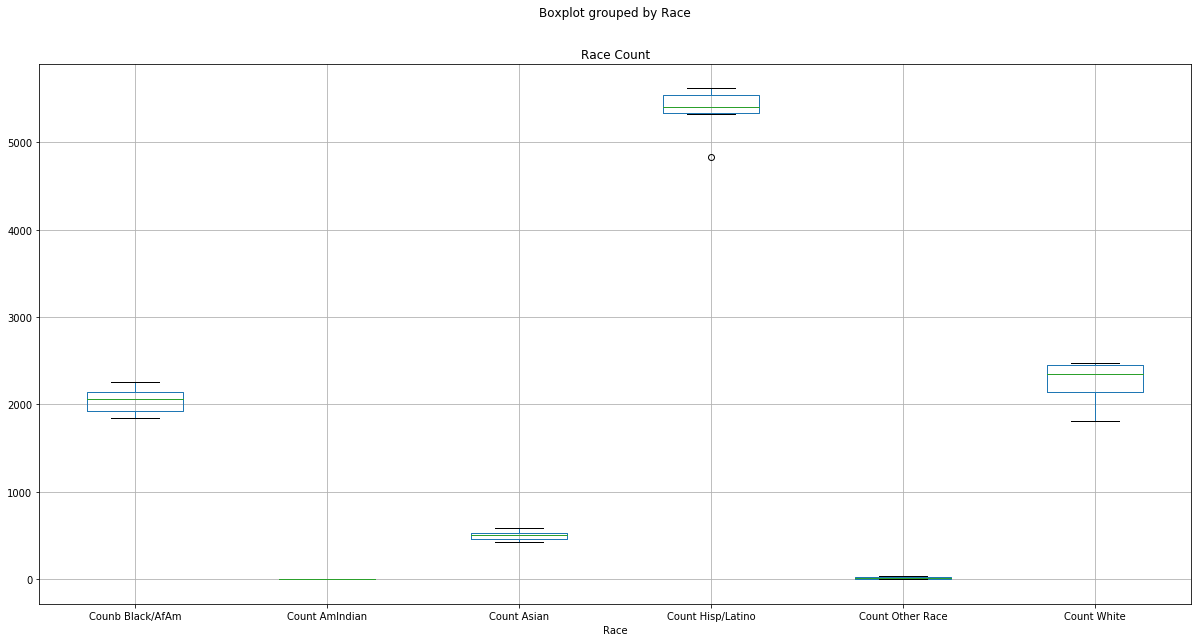

In [39]:
zip_003.boxplot("Race Count", by="Race", figsize=(20, 10))